Name: Ruben Dario Aguirre Ruales

ID: 1152709857

Homework 1:
Generate a set of 𝑁 points of the function $sin^2(X)$, between $0$ and $2 \pi$, including an array of 𝑥 positions, 𝑦=𝑓(𝑥) and first derivative 𝑦′=𝑓′(𝑥)

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

Instructions:
Below you will find some examples but try not to use the infamous copy and paste method. Use those as a reference. (Except the hermite polynomial routine (hdiff, hermite) which you can copy and paste)

Useful examples:
use as a reference , $\color{red}{\text{DO NOT COPY &amp; PASTE}}$ (except th Hermite functions - below)

**Real Function**

<function matplotlib.pyplot.show>

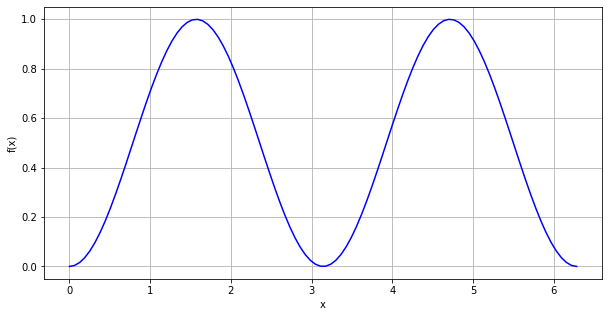

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#we define the function here
def f(x):
    return np.sin(x)**2
def df(x):
    return 2*np.sin(x)*np.cos(x)

x = np.linspace(0, 2*np.pi, 100)
function=f(x)
plt.figure(figsize = (10,5))
plt.plot( x, function, color="blue")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show

**Points**

<function matplotlib.pyplot.show>

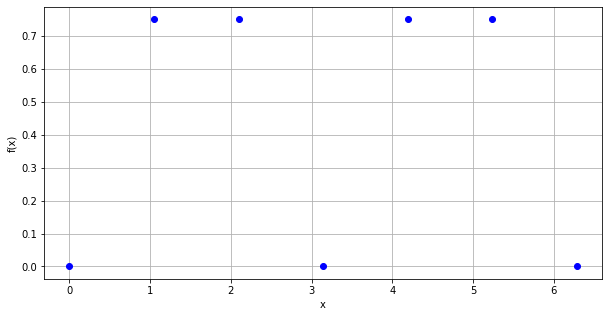

In [41]:
xl = np.linspace(0,2*np.pi, 7)#I choose 7 intervals
y = f(xl)
plt.figure(figsize = (10,5))
plt.plot( xl, y, "o", color="blue")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show

**Lagrange polynomial**

<function matplotlib.pyplot.show>

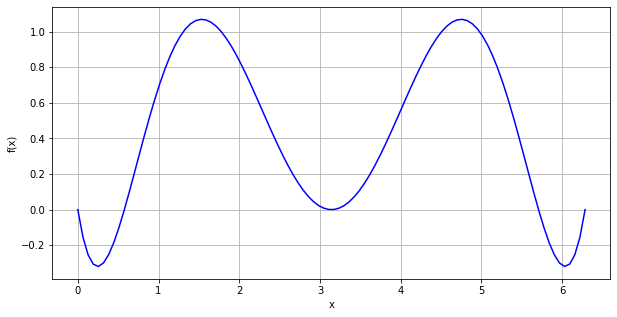

In [42]:
from scipy.interpolate import lagrange
xl = np.linspace(0,2*np.pi, 7)#I choose 7 intervals
y = f(xl)
lagranges= lagrange(xdata,y)
plt.figure(figsize = (10,5))
plt.plot( x, lagranges(x), color="blue")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show

**Hermite polynomial**

<function matplotlib.pyplot.show>

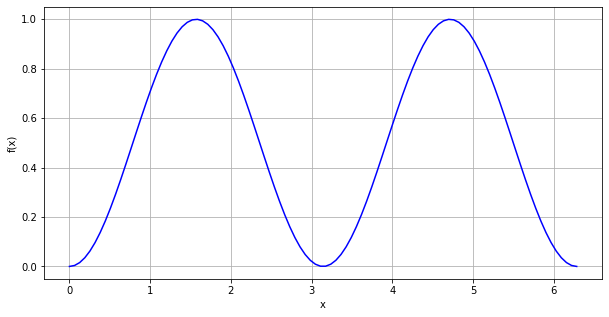

In [39]:
#copy-paste the code 
def hdiff(x, y, yprime):
    m = x.size 
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): 
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l):
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size 
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum

x = np.linspace(0,2*np.pi, 100)
xl = np.linspace(0,2*np.pi, 7)#I choose 7 intervals
yprime = df(xl)
hermites = hermite(xl, y, yprime, x)
plt.figure(figsize = (10,5))
plt.plot( x, hermites, color="blue")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show

**Hermite vs Lagrange vs Real function**

<function matplotlib.pyplot.show>

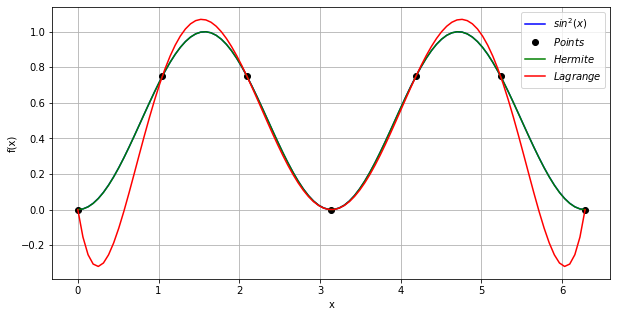

In [47]:
plt.figure(figsize = (10,5))
plt.plot( x, function, label='$sin^2(x)$', color="blue")
plt.plot( xl, y, "o", label='$Points$', color="black")
plt.plot( x, hermites, label='$Hermite$', color="green")
plt.plot( x, lagranges(x), label='$Lagrange$', color="red")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show

For the function $sin^2(X)$, Hermite interpolation works better than the Lagrange interpolation because on the Lagrange interpolation the error it's bigger than the Hermite interpolation